In [1]:
# import relevant libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import time # to measure how long the models take
from sklearn import datasets
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, precision_recall_curve
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Import data

In [2]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/lilfakeS/schulich_data_science/main/ds2_a1_train.csv')

# Data pre-processing

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 1 columns):
 #   Column                                                                                                                                                Non-Null Count  Dtype 
---  ------                                                                                                                                                --------------  ----- 
 0   age;"job";"marital";"education";"default";"balance";"housing";"loan";"contact";"day";"month";"duration";"campaign";"pdays";"previous";"poutcome";"y"  45211 non-null  object
dtypes: object(1)
memory usage: 353.3+ KB


In [5]:
data

,"age;""job"";""marital"";""education"";""default"";""balance"";""housing"";""loan"";""contact"";""day"";""month"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""y"""
0,"58;""management"";""married"";""tertiary"";""no"";2143..."
1,"44;""technician"";""single"";""secondary"";""no"";29;""..."
2,"33;""entrepreneur"";""married"";""secondary"";""no"";2..."
3,"47;""blue-collar"";""married"";""unknown"";""no"";1506..."
4,"33;""unknown"";""single"";""unknown"";""no"";1;""no"";""n..."
...,...
45206,"51;""technician"";""married"";""tertiary"";""no"";825;..."
45207,"71;""retired"";""divorced"";""primary"";""no"";1729;""n..."
45208,"72;""retired"";""married"";""secondary"";""no"";5715;""..."
45209,"57;""blue-collar"";""married"";""secondary"";""no"";66..."


In [6]:
data[['age',"job","marital","education","default","balance","housing","loan","contact","day","month","duration","campaign","pdays","previous","poutcome","y"]] = data['age;"job";"marital";"education";"default";"balance";"housing";"loan";"contact";"day";"month";"duration";"campaign";"pdays";"previous";"poutcome";"y"'].str.split(';', expand=True)

In [7]:
data

,"age;""job"";""marital"";""education"";""default"";""balance"";""housing"";""loan"";""contact"";""day"";""month"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""y""",age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,"58;""management"";""married"";""tertiary"";""no"";2143...",58,"""management""","""married""","""tertiary""","""no""",2143,"""yes""","""no""","""unknown""",5,"""may""",261,1,-1,0,"""unknown""","""no"""
1,"44;""technician"";""single"";""secondary"";""no"";29;""...",44,"""technician""","""single""","""secondary""","""no""",29,"""yes""","""no""","""unknown""",5,"""may""",151,1,-1,0,"""unknown""","""no"""
2,"33;""entrepreneur"";""married"";""secondary"";""no"";2...",33,"""entrepreneur""","""married""","""secondary""","""no""",2,"""yes""","""yes""","""unknown""",5,"""may""",76,1,-1,0,"""unknown""","""no"""
3,"47;""blue-collar"";""married"";""unknown"";""no"";1506...",47,"""blue-collar""","""married""","""unknown""","""no""",1506,"""yes""","""no""","""unknown""",5,"""may""",92,1,-1,0,"""unknown""","""no"""
4,"33;""unknown"";""single"";""unknown"";""no"";1;""no"";""n...",33,"""unknown""","""single""","""unknown""","""no""",1,"""no""","""no""","""unknown""",5,"""may""",198,1,-1,0,"""unknown""","""no"""
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,"51;""technician"";""married"";""tertiary"";""no"";825;...",51,"""technician""","""married""","""tertiary""","""no""",825,"""no""","""no""","""cellular""",17,"""nov""",977,3,-1,0,"""unknown""","""yes"""
45207,"71;""retired"";""divorced"";""primary"";""no"";1729;""n...",71,"""retired""","""divorced""","""primary""","""no""",1729,"""no""","""no""","""cellular""",17,"""nov""",456,2,-1,0,"""unknown""","""yes"""
45208,"72;""retired"";""married"";""secondary"";""no"";5715;""...",72,"""retired""","""married""","""secondary""","""no""",5715,"""no""","""no""","""cellular""",17,"""nov""",1127,5,184,3,"""success""","""yes"""
45209,"57;""blue-collar"";""married"";""secondary"";""no"";66...",57,"""blue-collar""","""married""","""secondary""","""no""",668,"""no""","""no""","""telephone""",17,"""nov""",508,4,-1,0,"""unknown""","""no"""


In [8]:
data = data.drop(['age;"job";"marital";"education";"default";"balance";"housing";"loan";"contact";"day";"month";"duration";"campaign";"pdays";"previous";"poutcome";"y"'],axis=1)

In [9]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,"""management""","""married""","""tertiary""","""no""",2143,"""yes""","""no""","""unknown""",5,"""may""",261,1,-1,0,"""unknown""","""no"""
1,44,"""technician""","""single""","""secondary""","""no""",29,"""yes""","""no""","""unknown""",5,"""may""",151,1,-1,0,"""unknown""","""no"""
2,33,"""entrepreneur""","""married""","""secondary""","""no""",2,"""yes""","""yes""","""unknown""",5,"""may""",76,1,-1,0,"""unknown""","""no"""
3,47,"""blue-collar""","""married""","""unknown""","""no""",1506,"""yes""","""no""","""unknown""",5,"""may""",92,1,-1,0,"""unknown""","""no"""
4,33,"""unknown""","""single""","""unknown""","""no""",1,"""no""","""no""","""unknown""",5,"""may""",198,1,-1,0,"""unknown""","""no"""
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,"""technician""","""married""","""tertiary""","""no""",825,"""no""","""no""","""cellular""",17,"""nov""",977,3,-1,0,"""unknown""","""yes"""
45207,71,"""retired""","""divorced""","""primary""","""no""",1729,"""no""","""no""","""cellular""",17,"""nov""",456,2,-1,0,"""unknown""","""yes"""
45208,72,"""retired""","""married""","""secondary""","""no""",5715,"""no""","""no""","""cellular""",17,"""nov""",1127,5,184,3,"""success""","""yes"""
45209,57,"""blue-collar""","""married""","""secondary""","""no""",668,"""no""","""no""","""telephone""",17,"""nov""",508,4,-1,0,"""unknown""","""no"""


In [10]:
columns_to_select = ['job', 'marital', 'education', 'default', 'housing',	'loan',	'contact','month', 'poutcome',	'y']

for column in columns_to_select:
    data[column] = data[column].str.strip('"')

In [11]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [12]:
# data = data.drop('contact',axis=1)
data = data.drop('day',axis=1)
#data = data.drop('month',axis=1)
data= data.drop('pdays',axis=1)

In [13]:
data

,age,job,marital,education,default,balance,housing,loan,contact,month,duration,campaign,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,may,261,1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,may,151,1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,may,76,1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,may,92,1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,may,198,1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,nov,977,3,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,nov,456,2,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,nov,1127,5,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,nov,508,4,0,unknown,no


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  object
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  object
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   month      45211 non-null  object
 10  duration   45211 non-null  object
 11  campaign   45211 non-null  object
 12  previous   45211 non-null  object
 13  poutcome   45211 non-null  object
 14  y          45211 non-null  object
dtypes: object(15)
memory usage: 5.2+ MB


In [15]:
num_col = ['age','balance','duration','campaign','previous']

for col in num_col:
    data[col] = pd.to_numeric(data[col])

<Axes: ylabel='balance'>

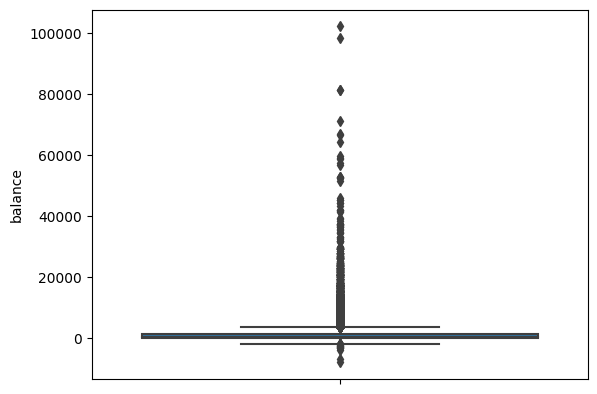

In [16]:
sns.boxplot(data = data, y='balance')

<Axes: xlabel='age', ylabel='Count'>

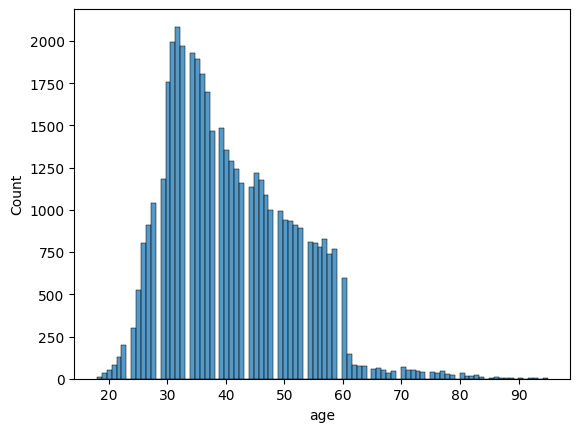

In [17]:
sns.histplot(data['age'])

<Axes: xlabel='job', ylabel='Count'>

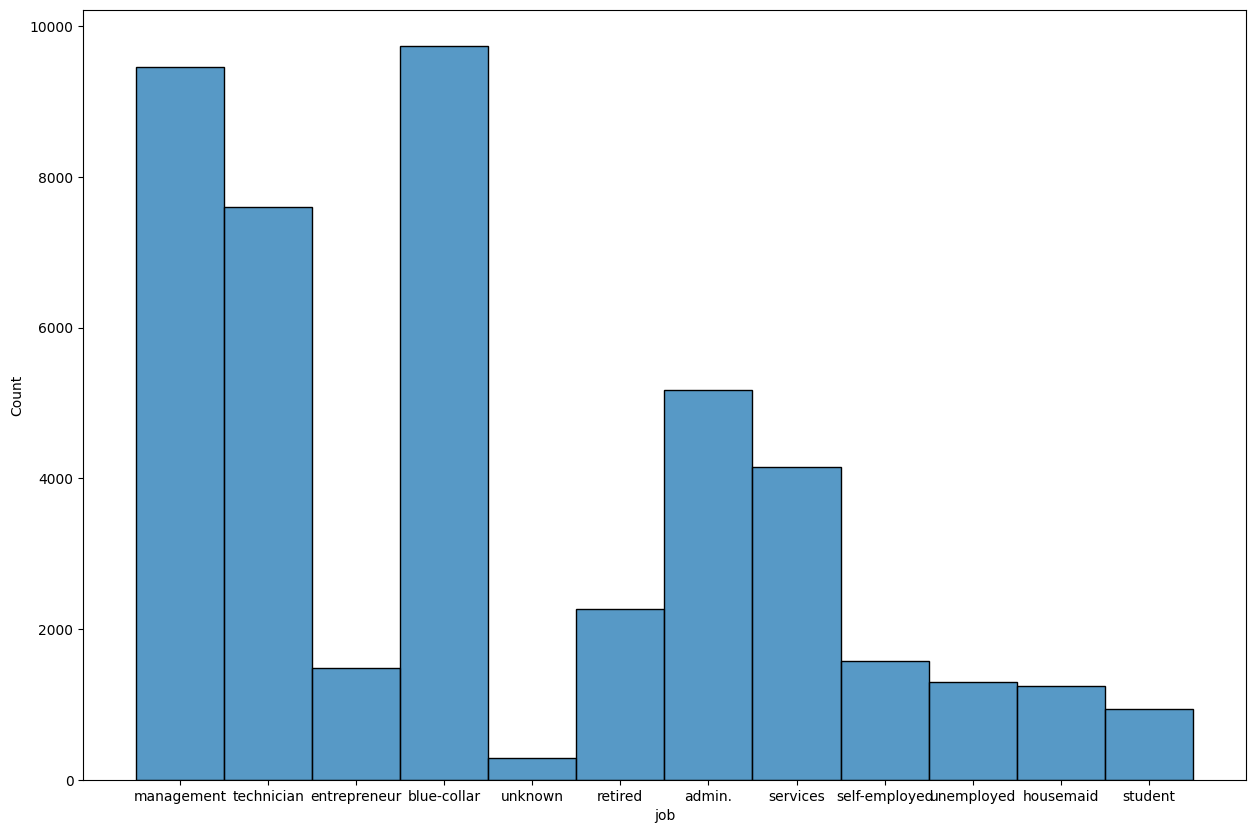

In [18]:
plt.figure(figsize=(15,10))
sns.histplot(data['job'])

<Axes: xlabel='month', ylabel='Count'>

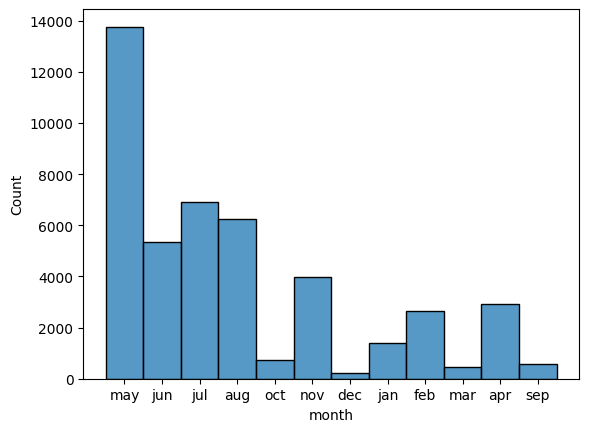

In [19]:
sns.histplot(data['month'])

<Axes: xlabel='y', ylabel='Count'>

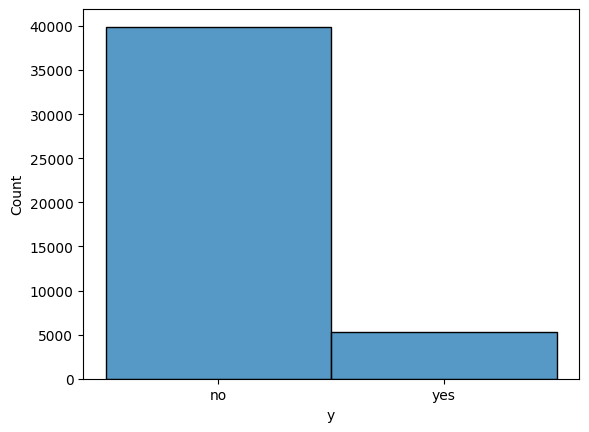

In [20]:
sns.histplot(data['y'])

In [21]:
cat_var = ['job', 'marital', 'education', 'contact', 'poutcome','default','housing','loan','month']

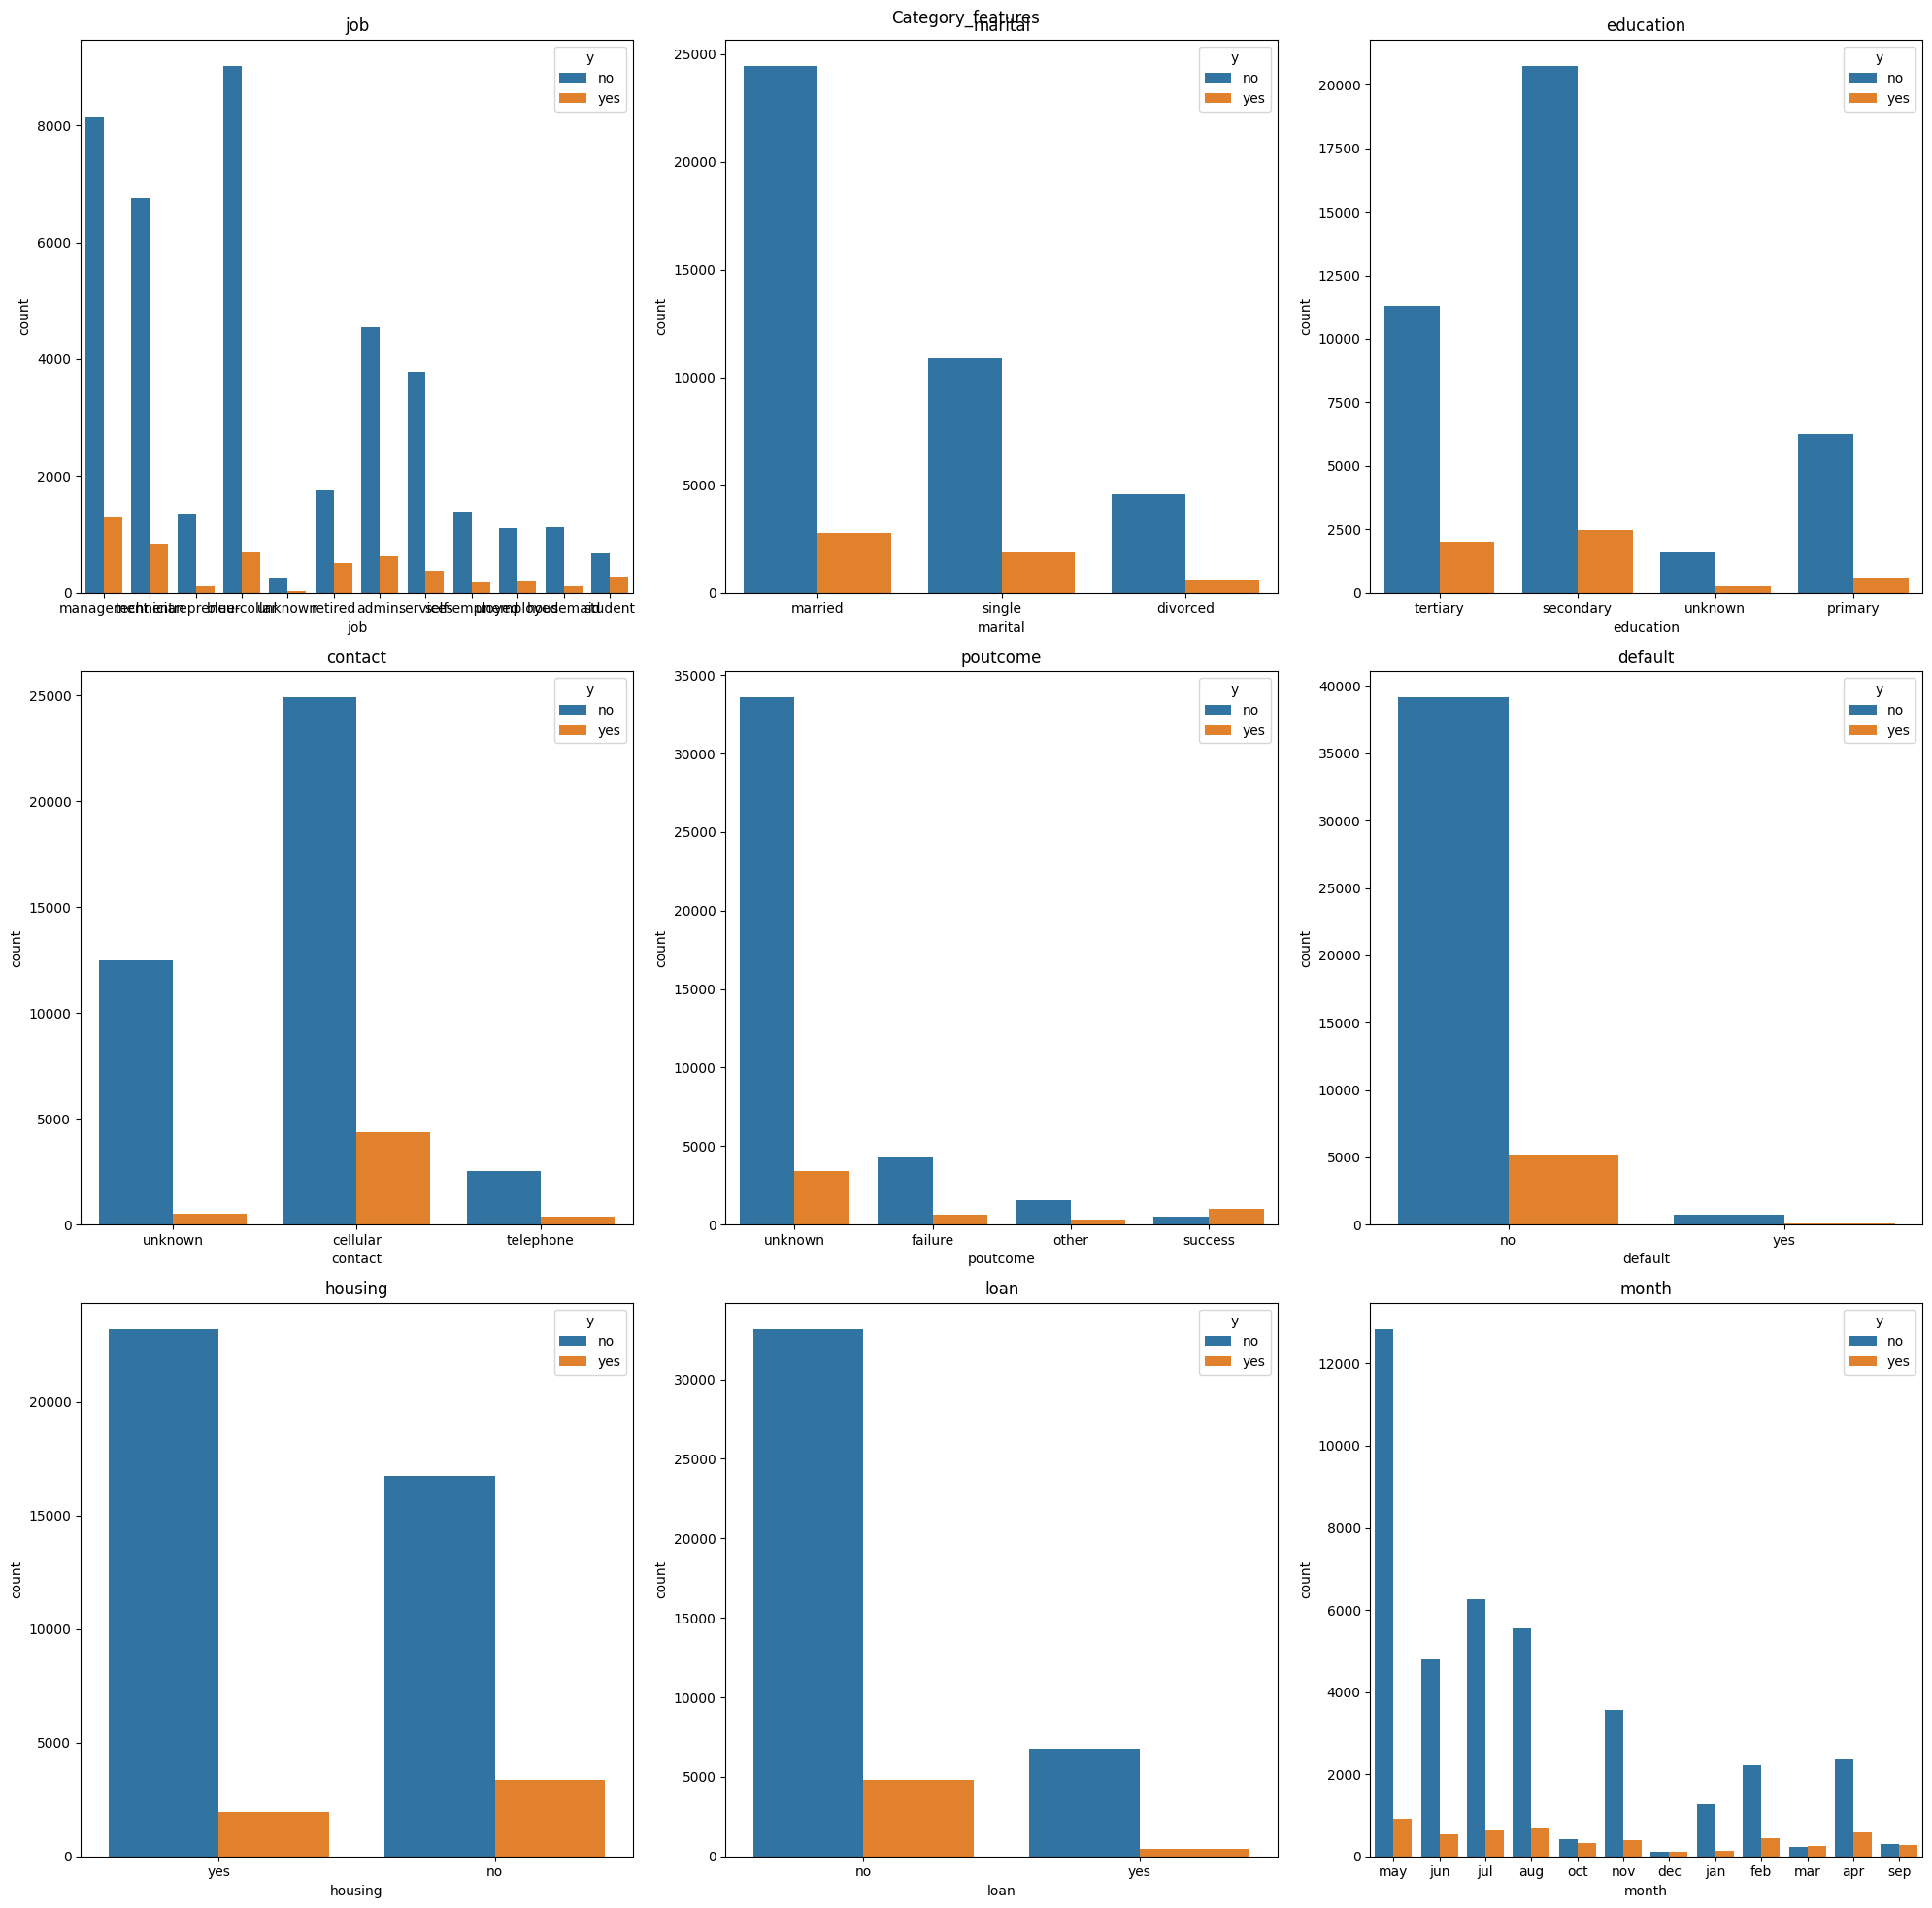

In [22]:
fig, axes = plt.subplots(3, 3, figsize=(20,20))
plt.suptitle("Category_features")

for i in range(min(9, len(cat_var))):  # Ensure that k doesn't exceed the length of Categorical_features or 9
    sns.countplot(ax=axes[i//3][i%3], data=data, x=cat_var[i], hue='y')
    axes[i//3][i%3].set_title(cat_var[i])

plt.tight_layout()
plt.show()

In [23]:
data['y'] = data['y'].replace({'yes': 1, 'no': 0})
data['default'] = data['default'].replace({'yes': 1, 'no': 0})
data['housing'] = data['housing'].replace({'yes': 1, 'no': 0})
data['loan'] = data['loan'].replace({'yes': 1, 'no': 0})

In [24]:
data

,age,job,marital,education,default,balance,housing,loan,contact,month,duration,campaign,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,may,261,1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,may,151,1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,may,76,1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,may,92,1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,may,198,1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,0,825,0,0,cellular,nov,977,3,0,unknown,1
45207,71,retired,divorced,primary,0,1729,0,0,cellular,nov,456,2,0,unknown,1
45208,72,retired,married,secondary,0,5715,0,0,cellular,nov,1127,5,3,success,1
45209,57,blue-collar,married,secondary,0,668,0,0,telephone,nov,508,4,0,unknown,0


In [25]:
y = data["y"]
X = data.drop("y", axis=1)

In [37]:
# Identify numerical and categorical columns
#num_cols = X.select_dtypes(include=['float64', 'int64']).columns
#cat_cols = X.select_dtypes(include=['object']).columns
num_cols = ['age','balance','duration','campaign','previous']
cat_cols = ['job', 'marital', 'education', 'contact', 'poutcome','default','housing','loan']

In [38]:
num_cols

['age', 'balance', 'duration', 'campaign', 'previous']

In [39]:
cat_cols

['job',
 'marital',
 'education',
 'contact',
 'poutcome',
 'default',
 'housing',
 'loan']

In [40]:
# Create a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(), cat_cols)])

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=111)

In [42]:
y_test

1657     0
18914    0
31794    0
2138     0
29529    0
        ..
41766    0
17298    0
36787    0
13249    0
20265    0
Name: y, Length: 9043, dtype: int64

In [43]:
y_train

43550    0
42654    0
29455    0
21126    0
42918    1
        ..
40211    0
36950    0
4820     0
10196    0
12116    0
Name: y, Length: 36168, dtype: int64

## Explaination

1. First of all, I did data cleaning and transformation before and data engineering. The dataset is very cleaning, it has no missing values, but I have to use slicing to build a organized DataFrame. Then, I transformed all binary columns into 0 and 1. 
2. I deleted 'days' and 'pday' to aviod redundant and unnecessary information in the model. And I deleted 'month' as well, it because after I tested a few base models, I found that if I include month in the model, the running time will increased for 4 times and even more time in the tuning process but with a little change in the result. In order to avoid high time cost, I decided to delete 'month'
3. I drew some plots to investigate the distribution patterns of the dataset. The Overall Exited rate is about 11%, and the distribution in all category variables are fairly the same.
4. After this, I used One Hot Encoding and Scaling build a pipeline for the data.  

# Build baseline models

In [44]:
# Set up models to compare - I am adding some initial parameters

knn = KNeighborsClassifier(n_neighbors=100)
log_reg = LogisticRegression()
dt = DecisionTreeClassifier(max_depth=100)
rf = RandomForestClassifier()
ada = AdaBoostClassifier()
bag = BaggingClassifier()
voting = VotingClassifier(estimators=[('lr', log_reg), ('knn', knn), ('dt', dt)])
voting_soft = VotingClassifier(estimators=[('lr', log_reg), ('knn', knn), ('dt', dt)],voting= 'soft')
voting_hard = VotingClassifier(estimators=[('lr', log_reg), ('knn', knn), ('dt', dt)],voting= 'hard')

In [45]:
classifiers = {
    'K-Nearest Neighbors': knn,
    'Logistic Regression': log_reg,
    'Decision Tree': dt,
    'Random Forest': rf,
    'AdaBoost': ada,
    'Bagging': bag,
    'Voting': voting,
    'Voting_soft': voting_soft,
    'Voting_hard': voting_hard
}

In [46]:
# Create dictionary to store the results of each model
results = {}

In [47]:
# Loop through list of models to compare performance
for name, clf in classifiers.items():
    start_time = time.time()
    
    # Create pipeline
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', clf)])
    
    # Fit the model
    pipeline.fit(X_train, y_train)
    
    # Make predictions
    y_pred = pipeline.predict(X_test)
    
    # Compute metrics
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    
    end_time = time.time()
    elapsed_time = end_time - start_time
    
    # Store results
    results[name] = {
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Accuracy': accuracy,
        'Time (s)': elapsed_time
    }

# Convert results to DataFrame for easier viewing
results_df = pd.DataFrame(results).T
print(results_df)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

                     Precision    Recall  F1-Score  Accuracy  Time (s)
K-Nearest Neighbors   0.663743  0.212547  0.321986  0.894283  0.414167
Logistic Regression   0.684112  0.342697  0.456644  0.903682  0.511981
Decision Tree         0.381034  0.413858  0.396768  0.851377  0.297180
Random Forest         0.619345  0.371723  0.464599  0.898817  2.223088
AdaBoost              0.626750  0.377341  0.471070  0.899923  0.850602
Bagging               0.567442  0.342697  0.427320  0.891518  0.996570
Voting                0.676471  0.301498  0.417098  0.900476  1.046265
Voting_soft           0.584395  0.343633  0.432783  0.893619  0.936649
Voting_hard           0.673597  0.303371  0.418334  0.900365  1.047420


# Ensemble modelling

In [48]:
import warnings

warnings.filterwarnings('ignore', category=UserWarning)

In [49]:
classifiers_2 = {
    'K-Nearest Neighbors': knn,
    'Logistic Regression': log_reg,
    'Decision Tree': dt,
    'Random Forest': rf,
    'AdaBoost': ada,
    'Bagging': bag,
    'Voting': voting
}

In [50]:
# Import additional libraries
from sklearn.model_selection import GridSearchCV

# Hyperparameter grids for tuning
knn_params = {'classifier__n_neighbors': [3, 5, 7, 20, 30, 50, 100]}
log_reg_params = {'classifier__C': [0.1, 1, 10]}
dt_params = {'classifier__max_depth': [10,20,30,40,50]}
rf_params = {'classifier__n_estimators': [50, 100, 150], 'classifier__max_depth': [None, 10, 20, 30, 50]}
ada_params = {'classifier__n_estimators': [25, 50, 75]}
bag_params = {'classifier__n_estimators': [5, 10, 20]}
voting_params = {'classifier__voting': ['hard', 'soft']}

params_dict = {
    'K-Nearest Neighbors': knn_params,
    'Logistic Regression': log_reg_params,
    'Decision Tree': dt_params,
    'Random Forest': rf_params,
    'AdaBoost': ada_params,
    'Bagging': bag_params,
    'Voting': voting_params
}

# Initialize results dictionary for tuned models
tuned_results = {}

# Loop through classifiers for tuning
for name, clf in classifiers_2.items():
    start_time = time.time()
    
    # Create pipeline
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', clf)])
    
    # Create GridSearchCV object
    grid = GridSearchCV(pipeline, params_dict[name], cv=5)
    
    # Fit the model
    grid.fit(X_train, y_train)
    
    # Get the best estimator and predict
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)
    
    # Compute metrics
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    
    end_time = time.time()
    elapsed_time = end_time - start_time
    
    # Store results
    tuned_results[name] = {
        'Best Params': grid.best_params_,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Accuracy': accuracy,
        'Time (s)': elapsed_time
    }

# Convert results to DataFrame for easier viewing
tuned_results_df = pd.DataFrame(tuned_results).T
print(tuned_results_df);

                                                           Best Params   
K-Nearest Neighbors                    {'classifier__n_neighbors': 20}  \
Logistic Regression                              {'classifier__C': 10}   
Decision Tree                            {'classifier__max_depth': 10}   
Random Forest        {'classifier__max_depth': 10, 'classifier__n_e...   
AdaBoost                              {'classifier__n_estimators': 75}   
Bagging                               {'classifier__n_estimators': 20}   
Voting                                  {'classifier__voting': 'hard'}   

                    Precision    Recall  F1-Score  Accuracy    Time (s)  
K-Nearest Neighbors  0.647597  0.264981   0.37608  0.896163   11.737331  
Logistic Regression  0.682836  0.342697  0.456359  0.903572    4.408778  
Decision Tree        0.597923  0.377341  0.462687  0.896495    3.894047  
Random Forest        0.713376  0.209738  0.324168  0.896716  120.525609  
AdaBoost               0.6368  0.3726

### Performance Comparison

1. Before tuning
    - Decision Tree has the most fast processing time but the performance is the worst in all models.
    - KNN has a considerable Precision and processing time, but the Recall rate and F1 Score are fairly low. This may not be a good model.
    - Logistic Regression has high precison, F1 Score and accuracy with considerable running time, but the recall rate is bad.
    - Random Forest model, although it has high accuracy, precision, the running time is the longest among all models.
    - AdaBoost has slightly higher running time, but its performance is nearly the best among all.
    - Bagging's performance is worse than Adaboost with higher running time.
    - Three kinds of voting models also have some difference, but in general, hard voting is better than soft voting.

2. After tuning
    - KNN has higher Recall and F1 Score than before, but the precision decreased. The running time increased relatively among all models.
    - Logistic Regression has no big change in all criterias.
    - Random Forest still has the longest running time and Recall rate, F1 score and accuracy are decreaed after tuning, which is not a good result.
    - AdaBoost has the moderate performacne after tuning, but it's the most cost effective one.
    - Bagging has outperformed than before, but it's running time is too long.
    - Voting has no big change in performance.

### Interpretation and Justification

1. Compare to baseline models, ensemble models has very explicit advantages and disadvantages. The advantages are ensemble models have relatively higher Precison and Accuarcy. Because ensemble models are combining a lot of models to make prediction, thus, some of the performance are better than baseline models. However, they will cost more time than baseline models, and may led some overfitting bias during the training process.

2. If I have to pick one model I will choose the AdaBoost in terms of this dataset. First, it has high recall rate, F1 Score and Accuracy, although its precision is not the best, it's still a considerable performance. The most important thing is it has a controlable running time with a decent performance in all aspects. Thus, AdaBoost can help the company to have a good prediction performance while have a relatively low time and economic cost.

3. I made this decison based on the overall peerformance among all models. But the most important thing this the cost effective of calculation. Because in the real world, the data will be way more larger than this one, in order to increase the effeciency while have a good performance, I balanced between prediction performance and running time. Thus, when implement similar models in business, company can save time and maintainance cost of the server with good prediction result. 